##**Programação e Algoritmos I**

Prof Alexandre Levada

###**Arquivos**

Até o presente momento, todas as informações processadas pelos nossos scripts Python são voláteis, uma vez que permanecem na memória RAM até o encerramento do programa. Quando o programa encerra sua execução, todas as variáveis alocadas na memória são permanentemente deletadas. A pergunta que surge é: como fazemos para conseguir manter os dados, ou seja, armazená-los em um dispositivo de memória persistente. É aí que entra o conceito de arquivo (file). Ao escrever dados em arquivos, podemos acessar essas informações mesmo depois que a execução do programa tiver encerrado. Há basicamente dois tipos de arquivos para armazenamento de dados:

1. Arquivos binários: nesse caso, toda informação gravada no arquivo está codificada em binário, ou seja, em 0’s e 1’s. Dessa forma, para ler o conteúdo do arquivo é preciso decodificar os dados.

2. Arquivos texto: nesse caso, toda informação gravada no arquivo será codificada como caracteres, ou seja, letras e números. Assim. A visualização do seu conteúdo pode ser feita utilizando qualquer editor de texto comum.

**Abrindo um arquivo**

Antes de ler ou escrever dados em um arquivo, é preciso primeiramente abri-lo. Em Python, o comando para isso é o open()

file = open(nome_do_arquivo, modo_de_acesso) 

em que nome_do_arquivo é uma string que armazenará o nome do arquivo no sistema operacional e modo_de_acesso é um string que especifica qual o tipo do arquivo e se desejamos ler ou escrever nele. A tabela a seguir resume dos modos de acessos.

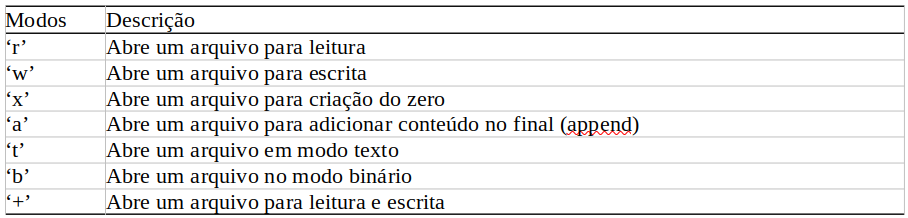


**Arquivos binários**

O script a seguir ilustra como escrever variáveis em um arquivo binário.

In [ ]:
# Abre arquivo para escrita em binário
f = open('binario.bin', 'wb')
# Cria um vetor de 5 elementos
L = [1, 2, 3, 4, 5]
M = [6, 7, 8]
# Converte o vetor para bytes (codificação para arquivo binário)
dados = bytearray(L)
# Escreve no arquivo
f.write(dados)
dados = bytearray(M)
f.write(dados)
# Fecha arquivo
f.close()

Agora, podemos ler o conteúdo do arquivo binario.bin para recuperar a variável L.

In [ ]:
# Abre arquivo para leitura
f = open('binario.bin', 'rb')

# Lê primeira variáve (primeiros 5 bytes)
# Cada inteiro é 1 byte
dados = f.read(5)
# Converte para lista
L = list(dados)
# Imprime conteúdo
print(L)

# Lê segunda variável (próximos 3 bytes)
dados = f.read(3)
# Converte para lista
M = list(dados)
# Imprime conteúdo
print(M)

# Fecha arquivo
f.close()

[1, 2, 3, 4, 5]
[6, 7, 8]


Para salvar vetores e matrizes, recomenda-se utilizar a função savez do pacote numpy.

In [ ]:
import numpy as np

A = np.random.random((5, 5))
B = np.random.randint(1, 10, (7, 7))

np.savez('numpy.npz', A=A, B=B)

Para recuperar vetores e matrizes de um arquivo, há a função load do pacote numpy.

In [ ]:
import numpy as np

dados = np.load('numpy.npz')

A = dados['A']
B = dados['B']

print(A)
print(B)

[[0.71640043 0.87876011 0.9673868  0.47241315 0.31287265]
 [0.15345802 0.15820933 0.15166292 0.62407988 0.02077651]
 [0.5697471  0.34589978 0.35191372 0.48277075 0.20484939]
 [0.3665801  0.72401314 0.54989511 0.06451211 0.23416892]
 [0.19305227 0.83634046 0.91576327 0.06585186 0.29555106]]
[[8 7 7 8 7 5 4]
 [1 3 3 3 3 6 5]
 [1 8 3 7 7 9 7]
 [3 4 3 7 2 7 9]
 [7 3 7 3 5 8 2]
 [8 6 5 7 9 5 8]
 [3 4 5 6 8 6 6]]


Note que ao utilizar as funções do pacote numpy não é necessário abrir e fechar o arquivo em questão de maneira explícita. Tudo isso já é gerenciado internamente pelos comandos savez e load.

**Arquivos texto**

Diferentemente dos arquivos binários, os arquivos textos são compostos por caracteres e strings. Sendo assim, para nós humanos é bem mais natural do que o formato binário. 

**Escrita em arquivo texto**

Basicamente, para escrever em um arquivo texto, utilizamos o comando write, passando como parâmetro uma string. 

In [ ]:
# Abre o arquivo
f = open("texto.txt", 'w', encoding='utf-8')
# Escreve várias linhas no arquivo
f.write("Primeira linha de texto\n")
f.write("Segunda linha de texto\n\n")
f.write("Arquivos textos são legais!")
# Fechando o arquivo
f.close()

Também é possível escrever uma lista de strings no arquivo texto com o comando writelines.

In [ ]:
# Escreve várias linhas de uma só vez
lista = ['Olá a todos, sejam bem-vindos!\n',\
        'Esse é um exemplo de como escrever em arquivos texto\n',\
             'utilizando o comando writelines()']
g = open('textfile.txt', 'w')
g.writelines(lista)
g.close()

Para salvar vetores e matrizes em arquivos texto, recomenda-se utilizar a função savetxt do pacote numpy.

In [ ]:
import numpy as np

# Gera matriz com números aleatórios
A = np.random.random((5, 5))
# Salva no arquivo texto usando 3 casas decimais
np.savetxt('testando.txt', A, fmt='%.3f')

**Leitura de arquivo texto**

Basicamente, a leitura de arquivos texto é realizada pela função read(). Se passarmos um argumento inteiro para a função, ela indica a quantidade de caracteres que serão lidos na sequência a partir do arquivo. Se não for passado parâmetro algum, a função lê todo conteúdo do arquivo texto em uma única string. Posteriormente, podemos utilizar o comando split() da string para separar em palavras. Alternativamente, o comando readline() realiza a leitura de exatamente uma linha do arquivo texto.

In [ ]:
# Abre arquivo
f = open('texto.txt', 'r')
# Lê uma linha do arquivo
linha = f.readline()
# Imprime linha na tela
print(linha)
# Lê 5 caracteres do arquivo
caracteres = f.read(5)
# Imprime na tela
print(caracteres)
# Fecha arquivo
f.close()

Primeira linha de texto

Segun


É possível utilizar um loop para ler todas as linhas do arquivo texto sequencialmente.

In [ ]:
# Abre arquivo
f = open('texto.txt', 'r')
# Loop para ler todas as linhas do arquivo
for linha in f:
    print(linha)

Primeira linha de texto

Segunda linha de texto



Arquivos textos são legais!


A seguir veremos alguns exercícios sobre manipulação de arquivos.

**Ex 56 (Curso Python para Zumbis):** Na pacata vila campestre de Numberville, todos os telefones tem 6 dígitos. A companhia telefônica estabelece as seguintes regras sobre os números:

1. Não pode haver dois dígitos consecutivos idênticos, pois isso é chato;
2. A soma dos dígitos tem que ser par, porque isso é legal;
3. O último dígito não pode ser igual ao primeiro, porque isso dá azar;

Dadas essas regras perfeitamente razoáveis, bem projetadas e maduras, quantos números de telefone na lista abaixo são válidos?

213752 216732 221063 221545 225583 229133 230648 233222
236043 237330 239636 240138 242123 246224 249183 252936
254711 257200 257607 261424 263814 266794 268649 273050
275001 277606 278997 283331 287104 287953 289137 291591
292559 292946 295180 295566 297529 300400 304707 306931
310638 313595 318449 319021 322082 323796 326266 326880
327249 329914 334392 334575 336723 336734 338808 343269
346040 350113 353631 357154 361633 361891 364889 365746
365749 366426 369156 369444 369689 372896 374983 375223
379163 380712 385640 386777 388599 389450 390178 392943
394742 395921 398644 398832 401149 402219 405364 408088
412901 417683 422267 424767 426613 430474 433910 435054
440052 444630 447852 449116 453865 457631 461750 462985
463328 466458 469601 473108 476773 477956 481991 482422
486195 488359 489209 489388 491928 496569 496964 497901
500877 502386 502715 507617 512526 512827 513796 518232
521455 524277 528496 529345 531231 531766 535067 535183
536593 537360 539055 540582 543708 547492 550779 551595
556493 558807 559102 562050 564962 569677 570945 575447
579937 580112 580680 582458 583012 585395 586244 587393
590483 593112 593894 594293 597525 598184 600455 600953
601523 605761 608618 609198 610141 610536 612636 615233
618314 622752 626345 626632 628889 629457 629643 633673
637656 641136 644176 644973 647617 652218 657143 659902
662224 666265 668010 672480 672695 676868 677125 678315

Obs: Copie e cole o conteúdo acima (números) num arquivo chamado numeros.txt

In [ ]:
# Condição 1: não pode haver 2 dígitos iguais em sequencia
def condicao1(digitos):
    cond1 = True
    for i in range(len(digitos)-1):
        if (digitos[i] == digitos[i+1]):
            cond1 = False
            break
    return cond1

# Condição 2: soma dos dígitos deve ser par
def condicao2(digitos):
  lista = list(digitos)  # converte para lista
  soma = 0
    
  for x in lista:
    soma = soma + int(x)  # converte para inteiro!
    if soma % 2 == 0:
      cond2 = True    # soma é par
    else:
      cond2 = False   # soma é ímpar
     
  return cond2

# Condição 3: último dígito não pode ser igual ao primeiro
def condicao3(digitos):
    if digitos[0] != digitos[-1]:
        cond3 = True
    else:
        cond3 = False

    return cond3

# Início do script
# Abre arquivo para leitura
f = open('numeros.txt', 'r')

# Lê dados do arquivo numa única string 
conteudo = f.read()

# Quebra string em lista (cada palavra vira um elemento da lista)
numeros = conteudo.split()
total = 0
# Percorre todos os elementos da lista
for num in numeros:

  if (condicao1(num) and condicao2(num) and condicao3(num)):
    total = total + 1

print('O total de números telefônicos válidos é %d' %total)

O total de números telefônicos válidos é 39


**Ex 57:** Contar o número de ocorrências das palavras em um texto é uma tarefa muito importante na internet, uma vez que plataformas como o Google, o Twitter e o Facebook analisam milhares delas por segundo. Um exemplo são os Trending Topics to Twitter que registra os tópicos mais citados na rede. Esse problema visa ilustrar de forma básica como podemos construir um histograma de palavras que compõem um texto. Para isso, iremos utilizar uma cópia do famoso livro “Alice no país das maravilhas”, disponível gratuitamente em formato .txt da seguinte URL 
https://www.gutenberg.org/files/11/11-0.txt

a) Quantas vezes o nome Alice aparece no texto?

b) Crie uma lista com todas as palavras iniciadas com a letra a e que tenha pelo menos 7 caracteres.

In [ ]:
import urllib.request
import string 

# Faz o download do livro em formato txt
urllib.request.urlretrieve('https://www.gutenberg.org/files/11/11-0.txt', 'alice.txt')

arquivo = open('alice.txt', 'r')    # abre arquivo para leitura

texto = arquivo.read()     # copia todo conteúdo do arquivo numa string 

texto = texto.lower()      # converte string para letras minúsculas 

# Substitui caracteres de pontuação por espaços em branco 
for c in string.punctuation: 
    texto = texto.replace(c, ' ') 

# Converte string para uma lista de palavras (separa por espaços) 
texto = texto.split() 

alice = 0
L = []
for palavra in texto:
    if palavra == 'alice':
        alice = alice + 1
    if palavra[0] == 'a' and len(palavra) > 6 and palavra not in L:
        L.append(palavra)

# Fecha arquivo 
arquivo.close() 

print('O nome Alice aparece %d vezes no texto' %alice)
print('Palavras iniciadas com a letra A e com ao menos 7 letras:')
print(L)
print(len(L))

O nome Alice aparece 385 vezes no texto
Palavras iniciadas com a letra A e com ao menos 7 letras:
['alice’s', 'adventures', 'anywhere', 'afterwards', 'actually', 'another', 'anything', 'antipathies', 'australia', 'altogether', 'against', 'anxiously', 'ashamed', 'animal’s', 'animals', 'assembled', 'argument', 'authority', 'accustomed', 'archbishop', 'advisable—’”', 'advisable', 'atheling', 'adjourn', 'adoption', 'audibly', 'acceptance', 'attending', 'angrily', 'addressing', 'answered', 'attempt', 'along—“catch', 'appeared', 'arranged', 'addressed', 'awfully', 'altered', 'annoyed', 'alternately', 'already', 'advantage', 'appearing', 'answers', 'accounts', 'alarmed', 'appearance', 'account', 'attends', 'appealed', 'arguments', 'anxious', 'affectionately', 'attended', 'absence', 'arithmetic—ambition', 'ancient', 'advance', 'askance—', 'adventures—beginning', 'accounting', 'arrived', 'accusation', 'attempts', 'applause', 'accidentally', 'accident', 'attempted', 'again—‘', 'associated', 'ava

**Ex 58:** Faça um programa que peça um número de 1 a 9 ao usuário e imprima a tabuada desse número em um arquivo texto.

In [ ]:
# Abre arquivo
f = open('tabuada.txt', 'w')

n = int(input('Você quer gerar a tabuada de que número? '))

# Cabeçalho
s = 'Tabuada do ' + str(n) + '\n'
f.write(s)
f.write('--------------\n')

for i in range(1, 11):
    x = i*n
    s = str(i) + ' x ' + str(n) + ' = ' + str(x) + '\n'
    f.write(s)
    
f.close()

Você quer gerar a tabuada de que número? 7


**Ex 59:** Dado o arquivo das notas de uma turma de Programação em Python conforme a seguir:

Alberto	8.5

Alan		6.5

Alex		7.0

Augusto	5.0

Beatriz		9.5

Carla		9.0

Débora		10.0

Diego		4.0

Eduardo	6.0

Gabriela	8.5

Gustavo	5.5

João		3.5

Juliana		7.0

Lucas		9.0

Marcela	7.0

Marcos	5.0

Osvaldo	4.5

Olívia		7.5

Paula		6.5

Roberto	10.0

Sílvio		5.5

Tatiana		8.0

Tiago		8.5

Valter		7.5

Vanderlei	3.0

OBS: Copie e cole o conteúdo acima para um arquivo chamado notas.txt
Leia o arquivo, calcule a média e o desvio padrão das notas. Em seguida produza 3 arquivos de saída: aprovados.txt, recuperacao.txt e reprovados.txt com os nomes e as notas dos alunos nessas  condições. Imprima na tela a média da turma, o desvio padrão, a nota mais baixa e a nota mais alta.

Critério de avaliação:

nota >= 6.0 – Aprovado

5.0 <= nota < 6.0 – Recuperação

nota < 5.0 - Reprovado

In [ ]:
import math

def media(L):
    soma = 0
    for x in L:
        soma = soma + x
    media = soma/len(L)
    return media

def desvio(L):
    soma = 0
    for x in L:
        soma = soma + (x - media(L))**2
    desvio = math.sqrt(soma/len(L))
    return desvio

def maximo(L):
    maior = L[0]
    for x in L:
        if x > maior:
            maior = x
    return maior

def minimo(L):
    menor = L[0]
    for x in L:
        if x < menor:
            menor = x
    return menor

# Abre arquivos
f = open('notas.txt', 'r')
aprovados = open('aprovados.txt', 'w')
recuperacao = open('recuperacao.txt', 'w')
reprovados = open('reprovados.txt', 'w')
# Lê as linhas
nomes = []
notas = []
for linha in f:
    L = linha.split()
    s = L[0]
    n = float(L[1])
    nomes.append(s)
    notas.append(n)
    if n >= 6.0:
        aprovados.write(linha)
    elif n >= 5.0 and n < 6.0:
        recuperacao.write(linha)
    elif n < 5.0:
        reprovados.write(linha)
 
# Imprime imformaçoes na tela
print('A média das notas é %.2f' %media(notas))
print('O desvio padrão das notas é %.2f' %desvio(notas))
print('A nota mais baixa da turma é %.2f' %minimo(notas))
print('A nota mais alta da turma é %.2f' %maximo(notas))
        
# Fecha os arquivos
f.close()
aprovados.close()
recuperacao.close()
reprovados.close()

A média das notas é 6.80
O desvio padrão das notas é 1.89
A nota mais baixa da turma é 3.00
A nota mais alta da turma é 10.00


Link para o ambiente Google Colab: https://colab.research.google.com/drive/1krAF44S_vMl0_llCAblchLrkDtwlF3tA?usp=sharing

"Enquanto o conhecimento custa o seu tempo no presente, a ignorância custa todo seu futuro." (Autor desconhecido)